# Lab04-2

In this assignment, you need to train regression models on Beijing PM2.5 dataset in winter of 2014.

You have to implement
1. a Linear(Polynomial) regressor
2. a Random Forest regressor

You need to show a residual plot for each of your model on both training data and testing data.
* R2  score need to be larger than 0.72 on testing data.

In [1]:
# Do not modify
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# inline plotting instead of popping out
%matplotlib inline


df = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv',
    sep=',')
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [2]:
# Do not modify
df = df.drop(['cbwd'], axis=1)  # drop non-scalar feature
df = df.dropna(axis=0, how='any')  # drop samples who has nan feature
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,6.25,2,0


In [3]:
# Do not modify
idx = np.logical_or(
    np.logical_and(df['year'].values == 2014, df['month'].values < 3),
    np.logical_and(df['year'].values == 2013, df['month'].values == 12))
X = df.loc[idx].drop('pm2.5', axis=1)
y = df.loc[idx]['pm2.5'].values
X.head()

,No,year,month,day,hour,DEWP,TEMP,PRES,Iws,Is,Ir
34320,34321,2013,12,1,0,-13,-2.0,1026.0,0.89,0,0
34321,34322,2013,12,1,1,-14,-3.0,1025.0,3.13,0,0
34322,34323,2013,12,1,2,-13,-3.0,1025.0,0.89,0,0
34323,34324,2013,12,1,3,-13,-4.0,1025.0,0.89,0,0
34324,34325,2013,12,1,4,-13,-3.0,1025.0,1.78,0,0


# Select proper variables

To select proper explanatory variables, we plot all the pairwise join distributions related to y.

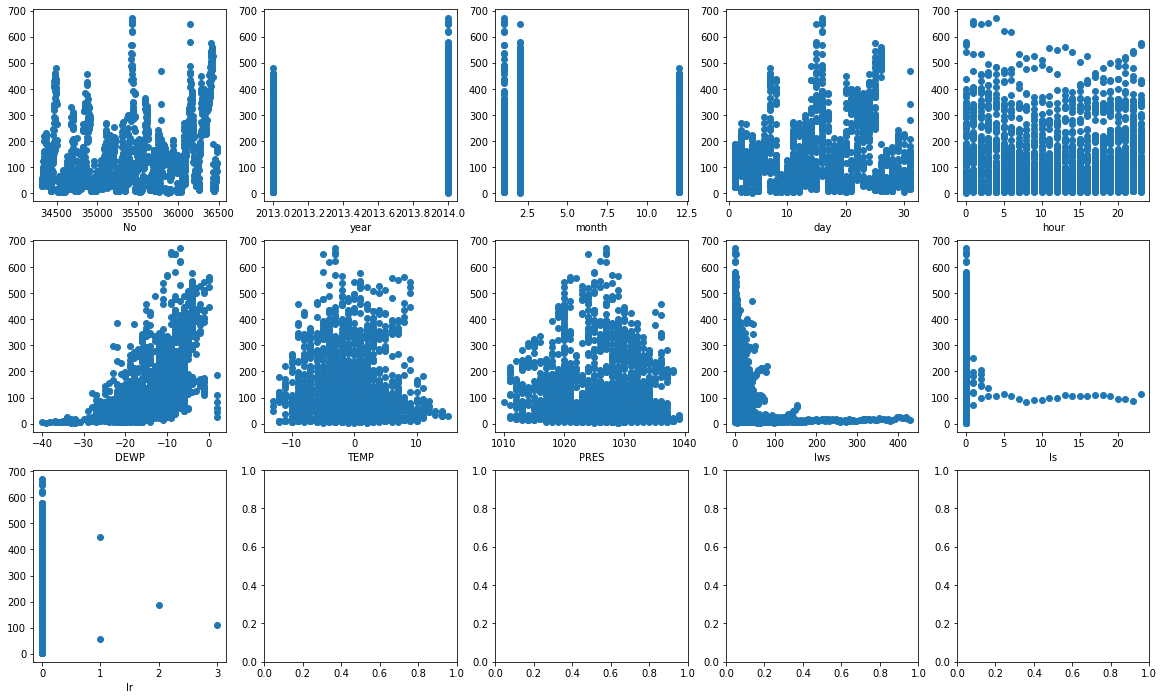

In [6]:
x_vars = ['No', 'year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES', 'Iws',
       'Is', 'Ir']

_, subplot_arr = plt.subplots(3, 5, figsize=(20, 12))
for idx, x_var in enumerate(x_vars):
    x_idx = idx // 5
    y_idx = idx % 5
    subplot_arr[x_idx, y_idx].scatter(X[x_var], y)
    subplot_arr[x_idx, y_idx].set_xlabel(x_var)
    
plt.show()

## Test

In [5]:
X_lin = X['DEWP'].values[:, np.newaxis]

regr = LinearRegression()

# Create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X_lin)
X_cubic = cubic.fit_transform(X_lin)

# Fit features
lin_regr = LinearRegression()
lin_regr.fit(X_lin, y)
linear_r2 = r2_score(y, lin_regr.predict(X_lin))

quad_regr = LinearRegression()
quad_regr.fit(X_quad, y)
quadratic_r2 = r2_score(y, quad_regr.predict(X_quad))

cubic_regr = LinearRegression()
cubic_regr.fit(X_cubic, y)
cubic_r2 = r2_score(y, cubic_regr.predict(X_cubic))

# Plot results
X_range = np.arange(X_lin.min(), X_lin.max(), 1)[:, np.newaxis]
y_lin_pred = lin_regr.predict(X_range)
y_quad_pred = quad_regr.predict(quadratic.fit_transform(X_range))
y_cubic_pred = cubic_regr.predict(cubic.fit_transform(X_range))

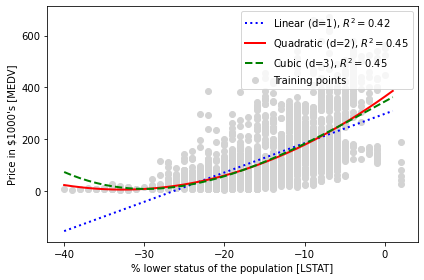

In [27]:
plt.scatter(X_lin, y, label='Training points', color='lightgray')

plt.plot(
    X_range,
    y_lin_pred,
    label='Linear (d=1), $R^2=%.2f$' % linear_r2,
    color='blue',
    lw=2,
    linestyle=':')

plt.plot(
    X_range,
    y_quad_pred,
    label='Quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
    color='red',
    lw=2,
    linestyle='-')

plt.plot(
    X_range,
    y_cubic_pred,
    label='Cubic (d=3), $R^2=%.2f$' % cubic_r2,
    color='green',
    lw=2,
    linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

## Linear Regressor (Polynomial features)

原本使用全部的feature會導致model沒有辦法fit成功，但是如果透過random forest所算出的feature importance，再去選擇較好的feature，能夠使這邊的R2 score不會得到負數。

然後degree這部分有測試過大約超過degree=12就會沒有辦法使test fit model。

degree=9時, R2 score of test set is 0.77.

Degree : 1
#Features: 12
MSE train: 8059.12, test: 9596.32
R^2 train: 0.48, test: 0.42
Degree : 2
#Features: 78
MSE train: 5309.03, test: 46335.98
R^2 train: 0.66, test: -1.79
Degree : 3
#Features: 364
MSE train: 3574.87, test: 2106675.62
R^2 train: 0.77, test: -126.00
Degree : 4
#Features: 1365
MSE train: 2154.22, test: 516472.73
R^2 train: 0.86, test: -30.14
Degree : 5
#Features: 4368
MSE train: 2056.53, test: 384867.77
R^2 train: 0.87, test: -22.20
Degree : 6
#Features: 12376
MSE train: 2061.91, test: 10640503.19
R^2 train: 0.87, test: -640.47
Degree : 7
#Features: 31824
MSE train: 2108.57, test: 7947670.94
R^2 train: 0.86, test: -478.13
Degree : 8
#Features: 75582
MSE train: 2169.91, test: 4557930.62
R^2 train: 0.86, test: -273.78
Degree : 9
#Features: 167960
MSE train: 2033.80, test: 5410576.50
R^2 train: 0.87, test: -325.18


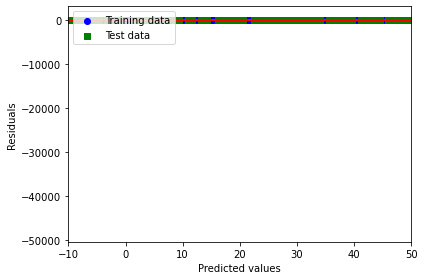

Degree : 10
#Features: 352716
MSE train: 2090.27, test: 4936822.34
R^2 train: 0.87, test: -296.62


In [ ]:
max_degree = 13

sc = StandardScaler()

# Selected features from the result of random forest
X_selected = X[['DEWP', 'No', 'day']]
X_std = sc.fit_transform(X_selected)
regr = LinearRegression()

for d in range(1, max_degree):
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X)
    
    X_train_std, X_test_std, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)
    
    print('Degree : %d' % d)
    print('#Features: %d' % X_train_std.shape[1])
    
    # Train
    regr = regr.fit(X_train_std, y_train)
    
    # Test
    y_train_pred = regr.predict(X_train_std)
    y_test_pred = regr.predict(X_test_std)
    
    # Show the result
    print('MSE train: %.2f, test: %.2f' %
          (mean_squared_error(y_train, y_train_pred),
           mean_squared_error(y_test, y_test_pred)))
    print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                           r2_score(y_test, y_test_pred)))

    if d == 9:
        # Residual plot
        plt.scatter(
            y_train_pred,
            y_train_pred - y_train,
            c='blue',
            marker='o',
            label='Training data')
        plt.scatter(
            y_test_pred, y_test_pred - y_test, c='green', marker='s', label='Test data')

        plt.xlabel('Predicted values')
        plt.ylabel('Residuals')
        plt.legend(loc='upper left')
        plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
        plt.xlim([-10, 50])
        plt.tight_layout()
        plt.show()


# Random Forest Regressor

MSE train: 201.67, test: 1485.75
R^2 train: 0.99, test: 0.90


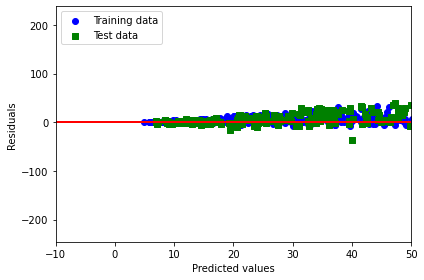

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

forest = RandomForestRegressor(
    n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

# Residual plot
plt.scatter(
    y_train_pred,
    y_train_pred - y_train,
    c='blue',
    marker='o',
    label='Training data')
plt.scatter(
    y_test_pred, y_test_pred - y_test, c='green', marker='s', label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()


<BarContainer object of 11 artists>

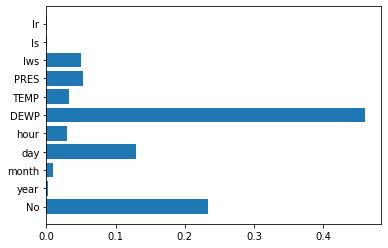

In [85]:
plt.barh(X.columns, forest.feature_importances_)